<a href="https://colab.research.google.com/github/Animeshsingh76/ML-Project/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv') ##loading the csv data to a pandas data frame

In [ ]:
gold_data.head() ##to print first 5 rows in dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
## to check the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
## getting the statstical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation=gold_data.corr()

<ipython-input-6-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

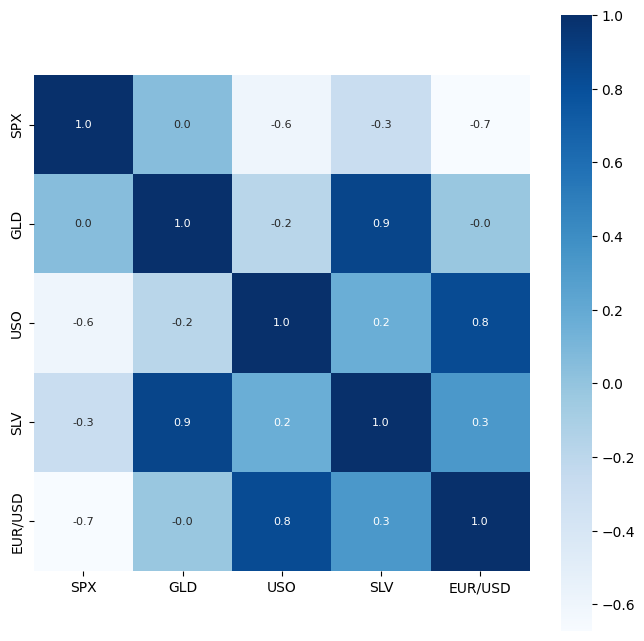

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-9-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

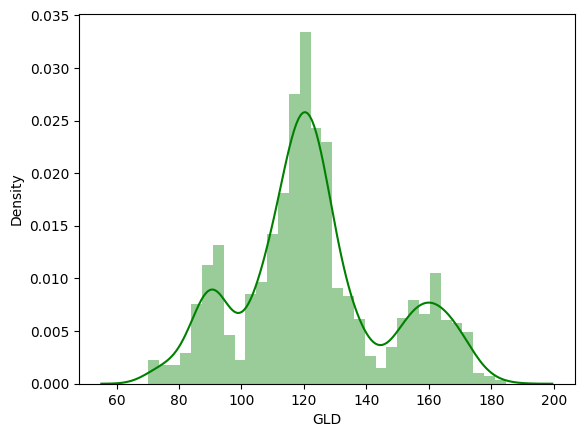

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']## splitting the features and the target

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training dataand test data

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state=2)

model training: ranom forest regressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
## training the model
regressor.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
test_data_prediction= regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.24839921  82.16259995 116.06869997 127.56930082 120.81820145
 154.65739761 150.4530988  126.10560022 117.37949894 126.02810047
 116.86030104 171.9255005  141.46389839 167.86689877 115.03330008
 117.49510054 137.23760329 169.87640054 159.53800339 159.19019948
 155.18740046 125.41590008 176.24449934 157.09200334 125.26520052
  93.73109959  78.13179993 120.63729981 119.13049945 167.44859999
  88.32870057 125.15739988  91.30050089 117.93109981 121.18379947
 136.62780096 115.32970125 115.46830063 147.30169972 107.14350108
 104.68990271  87.20759805 126.41590069 117.82549989 152.37099869
 119.62750001 108.37869978 108.01869805  93.31110063 127.07069805
  75.49809986 113.64559908 121.28059991 111.16789926 118.88049886
 120.69659969 159.74100043 165.46800095 147.0659964   85.80459872
  94.60370038  86.70149885  90.52200021 119.03010071 126.44180043
 127.40799984 169.30129958 122.25339926 117.44089917  98.62010024
 168.9608017  143.02379783 131.63780315 121.15970259 121.79519926
 119.59680

In [ ]:
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894016196203986


compare the actul value and predicted values in a plot

In [ ]:
y_test=list(y_test )

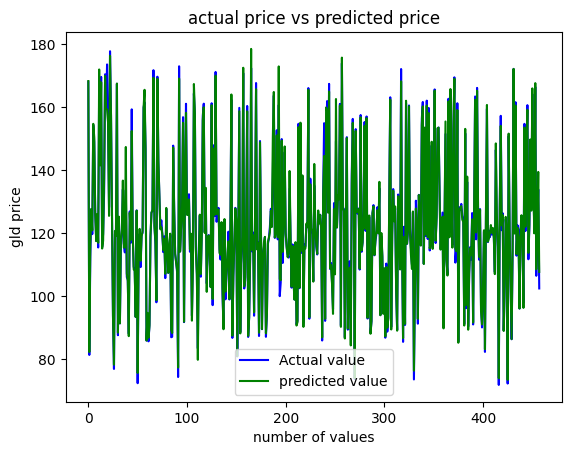

In [ ]:
plt.plot(y_test, color="blue",label ="Actual value")
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title("actual price vs predicted price")
plt.xlabel("number of values")
plt.ylabel("gld price")
plt.legend()
plt.show()

so the plot aove clearly specifies that our predicted value is almost accurate to the actual value.